## Step1: Import the libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


### Step2: Load the data

In [5]:
df=pd.read_csv("insurance.csv")
df.head(4)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061


In [6]:
## lets understnad the data information and columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### 7 columns and 1338 rows in which we are considering charges as our predictor

## Exploratory Data analysis

In [7]:
### Check for the missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### since none of the columns has the missing value, so no need to do any treatment

In [8]:
 ### let us understand what percentage of male and female are present in our data set
df_sex_values=df['sex'].value_counts().values

In [9]:
df_sex_index=df['sex'].value_counts().index

([<matplotlib.patches.Wedge at 0x24cc19a6be0>,
 [Text(-0.018078568997004985, 1.0998514287589123, 'male'),
  Text(0.018078568997005343, -1.0998514287589123, 'female')],
 [Text(-0.009861037634729992, 0.5999189611412249, '50.52%'),
  Text(0.009861037634730185, -0.5999189611412248, '49.48%')])

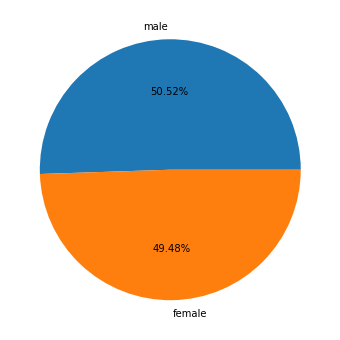

In [10]:
### draw the pie chart to understand the distribution
plt.figure(figsize=(12,6))
plt.pie(df_sex_values,labels=df_sex_index,autopct="%1.2f%%")

#### 50.52 % of males and 49.48%% females

In [11]:
df_age_sex=df[['sex','age',]].groupby(['sex','age']).size().reset_index()

In [12]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

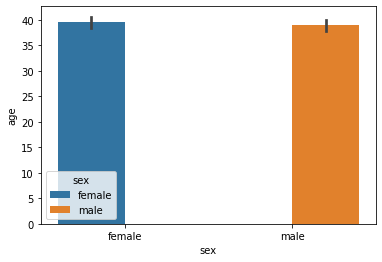

In [13]:
sns.barplot(x='sex',y='age',hue='sex',data=df)

In [14]:
### analysing Smoker vs non smoker

df_smoker_label=df['smoker'].value_counts().index
df_smoker_value=df['smoker'].value_counts().values

([<matplotlib.patches.Wedge at 0x24cc1a77e80>,
 [Text(-0.8801026332278259, 0.6598631335250117, 'no'),
  Text(0.8801026332278258, -0.6598631335250118, 'yes')],
 [Text(-0.48005598176063224, 0.3599253455590972, '79.52%'),
  Text(0.48005598176063213, -0.3599253455590973, '20.48%')])

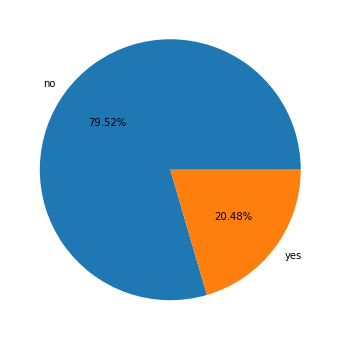

In [15]:
plt.figure(figsize=(12,6))
plt.pie(df_smoker_value,labels=df_smoker_label,autopct="%1.2f%%")

### Smokers
-Categorical columns

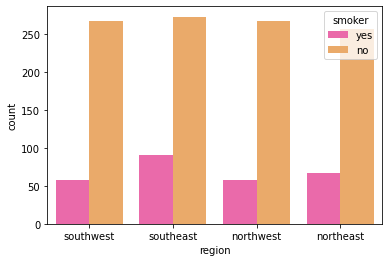

In [16]:
### Analysing region vise smokers

sns.countplot(x='region',data=df,hue='smoker',palette='spring')

## Understand the data distribution

In [17]:
numeric=df.select_dtypes(include=['int64','float64'])


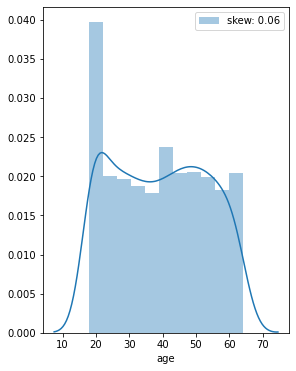

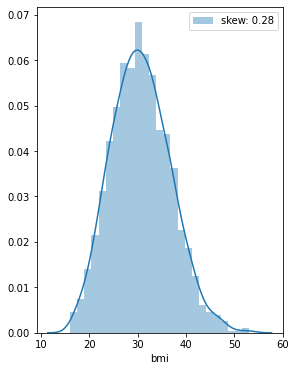

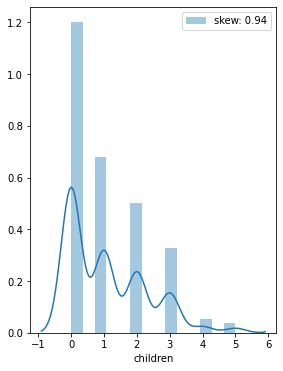

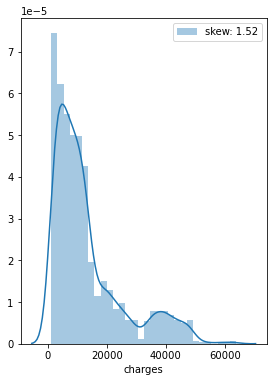

In [18]:
for i in numeric:
    plt.figure(figsize=(15,6))
    plt.subplot(131)
    sns.distplot(numeric[i], label="skew: " + str(np.round(numeric[i].skew(),2)))
    plt.legend()
    plt.show()
    

#### A skewness value greater than 1 or less than -1 indicates a highly skewed distribution. A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.

01) Age and BMI are fairly Skewed because skewness is between -0.5 to 0.5

02) Children is moderately skewed 

03) Charges are highly skewed


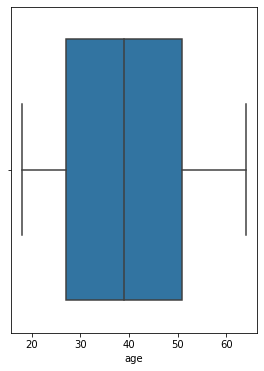

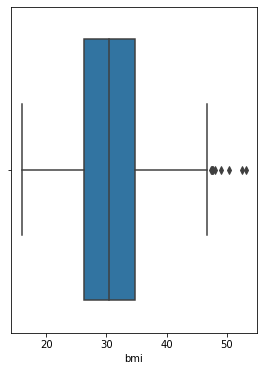

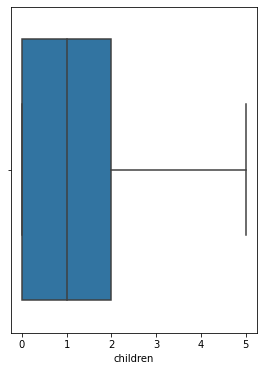

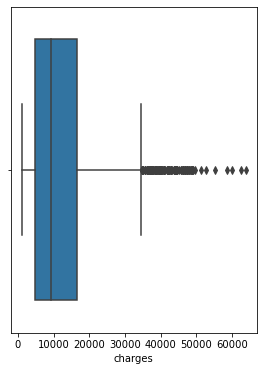

In [19]:
### outlier anlaysis

for i in numeric:
    plt.figure(figsize=(15,6))
    plt.subplot(131)
    sns.boxplot(numeric[i])
    
    plt.show()
    


In [20]:
### since Cahrges has more outliers let's see the quantiles

df['charges'].quantile([0.01,0.02,0.03,0.04, 0.25, 0.5,0.75, 0.9,0.95,0.96,0.97,0.98,0.99,1.0])


0.01     1252.972730
0.02     1621.741650
0.03     1636.154889
0.04     1709.934254
0.25     4740.287150
0.50     9382.033000
0.75    16639.912515
0.90    34831.719700
0.95    41181.827787
0.96    42915.605644
0.97    44492.862728
0.98    46676.189821
0.99    48537.480726
1.00    63770.428010
Name: charges, dtype: float64

In [21]:
### Z-Score before the treatment

In [22]:
for X in df.describe().columns:
    print('The skewness and Max_Z-Score value for {} is {} and {} respectively'.format(X,df[X].skew(),np.max(abs(stats.zscore(df[X])))))

The skewness and Max_Z-Score value for age is 0.05567251565299186 and 1.7652893000611625 respectively
The skewness and Max_Z-Score value for bmi is 0.2840471105987448 and 3.685522232281654 respectively
The skewness and Max_Z-Score value for children is 0.9383804401702414 and 3.240618711442044 respectively
The skewness and Max_Z-Score value for charges is 1.5158796580240388 and 4.17166316317004 respectively


In [23]:
col_sel=['bmi','children','charges']
def outlier_treatment(df, cols, factor):
    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        df[col] = np.where(df[col]>upper_whisker, upper_whisker,
                 np.where(df[col]<lower_whisker, lower_whisker, df[col]))
outlier_treatment(df, col_sel,1.5)

### Box plot after the treatment

In [24]:
df['charges'].quantile([0.01,0.02,0.03,0.04, 0.25, 0.5,0.75, 0.9,0.95,0.96,0.97,0.98,0.99,1.0])

0.01     1252.972730
0.02     1621.741650
0.03     1636.154889
0.04     1709.934254
0.25     4740.287150
0.50     9382.033000
0.75    16639.912515
0.90    34489.350562
0.95    34489.350562
0.96    34489.350562
0.97    34489.350562
0.98    34489.350562
0.99    34489.350562
1.00    34489.350562
Name: charges, dtype: float64

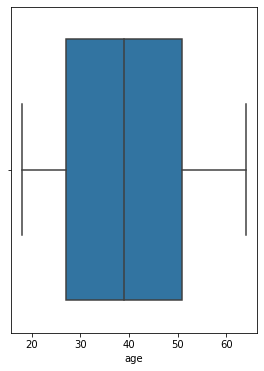

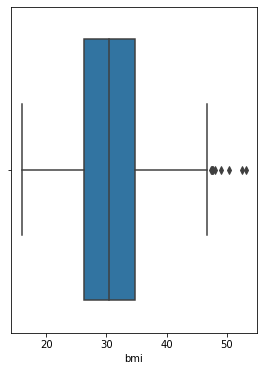

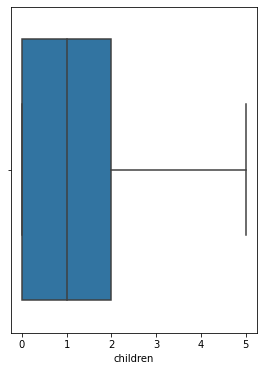

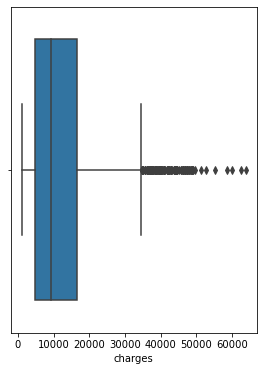

In [25]:
### outlier anlaysis

for i in numeric:
    plt.figure(figsize=(15,6))
    plt.subplot(131)
    sns.boxplot(numeric[i])
    plt.show()

In [26]:
for X in df.describe().columns:
    print('The skewness and Max_Z-Score value for {} is {} and {} respectively'.format(X,df[X].skew(),np.max(abs(stats.zscore(df[X])))))

The skewness and Max_Z-Score value for age is 0.05567251565299186 and 1.7652893000611625 respectively
The skewness and Max_Z-Score value for bmi is 0.23250655837488995 and 2.7482899415036535 respectively
The skewness and Max_Z-Score value for children is 0.9383804401702414 and 3.240618711442044 respectively
The skewness and Max_Z-Score value for charges is 1.0837301093573644 and 2.167561457989542 respectively


In [27]:
## Z-Score of the data points are within the range hence we can procced further

In [28]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

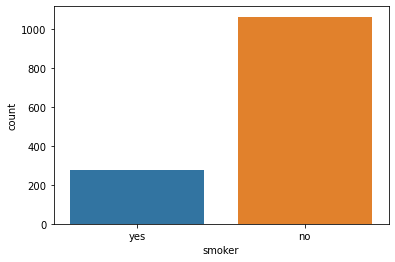

In [29]:
sns.countplot(x='smoker',data=df)

In [30]:
df['children'].value_counts().index

Float64Index([0.0, 1.0, 2.0, 3.0, 4.0, 5.0], dtype='float64')

In [31]:
## lets us understand how many childrens are smoking



In [32]:
### let's understand the correlation between the data

cor=df.corr()

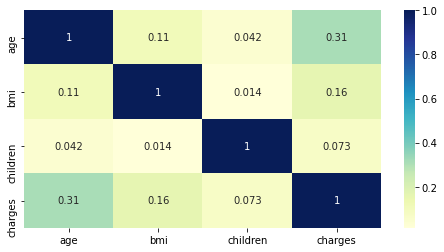

In [33]:
plt.figure(figsize=(8,4))
sns.heatmap(cor,annot=True,cmap="YlGnBu")


In [34]:
### Data distribution is not higly correlated, we can use all features for predicting the charges

## converting categorical data to numerical data

In [35]:
df.head(4)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0.0,yes,southwest,16884.92400
1,18,male,33.770,1.0,no,southeast,1725.55230
2,28,male,33.000,3.0,no,southeast,4449.46200
3,33,male,22.705,0.0,no,northwest,21984.47061


In [36]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [37]:
df['sex']=df['sex'].map({'female':0,'male':1})

In [38]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [39]:
df['smoker']=df['smoker'].map({'yes':1,'no':0})

In [40]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [41]:
df['region']=df['region'].map({'southwest':0, 'southeast':1, 'northwest':2, 'northeast':3})

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   float64
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 73.3 KB


### creating x and y variables

In [43]:
x=df
x=x.drop('charges',axis=1)

In [44]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0.0,1,0
1,18,1,33.770,1.0,0,1
2,28,1,33.000,3.0,0,1
3,33,1,22.705,0.0,0,2
4,32,1,28.880,0.0,0,2
...,...,...,...,...,...,...
1333,50,1,30.970,3.0,0,2
1334,18,0,31.920,0.0,0,3
1335,18,0,36.850,0.0,0,1
1336,21,0,25.800,0.0,0,0


In [45]:
y=df['charges']

In [46]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [47]:
### spliting the data into training and testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

### Model Building

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [49]:
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [50]:
## predicting y train
y_train_predict=linear_model.predict(x_train)

In [51]:
## predicting y test
y_test_predict=linear_model.predict(x_test)

### Model Evaluation

In [52]:
r2_sore_train=r2_score(y_train,y_train_predict)
print("R2 score for the training data is:", r2_sore_train)

R2 score for the training data is: 0.7440887378199191


In [53]:
r2_score_test=r2_score(y_test,y_test_predict)
print("R2 score for the testing data is:",r2_score_test)

R2 score for the testing data is: 0.7617574207584393


In [54]:
### mean sqaured and absolute Error for trainig data set
print('MSE:',mean_squared_error(y_train,y_train_predict))
print('MAE:',mean_absolute_error(y_train,y_train_predict))

MSE: 26514392.84631441
MAE: 3366.0993041972483


In [55]:
### mean squared and absolute error for testing data set

print('MSE:',mean_squared_error(y_test,y_test_predict))
print('MAE:',mean_absolute_error(y_test,y_test_predict))

MSE: 24088140.063973136
MAE: 3160.250901870716


## Implemenation of Descision Regressor
## Random forest 
## XG Bossting
## Hyper Parameter tuning

In [56]:
from sklearn.tree import DecisionTreeRegressor

In [59]:
dtr=DecisionTreeRegressor(max_depth=3, random_state=1)
dtr.fit(x_train,y_train)


DecisionTreeRegressor(max_depth=3, random_state=1)

In [63]:
y_train_dtr_predict=dtr.predict(x_train)

In [64]:
y_test_dtr_predict=dtr.predict(x_test)

In [66]:
r2_sore_dtr_train=r2_score(y_train,y_train_dtr_predict)
print("R2 score for the training data is:", r2_sore_dtr_train)

R2 score for the training data is: 0.8176322198436679


In [68]:
r2_score_dtr_test=r2_score(y_test,y_test_dtr_predict)
print("R2 score for the testing data is:",r2_score_dtr_test)

R2 score for the testing data is: 0.8283900980415668
